# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from sklearn import datasets

# Import API key
from api_key   import weather_api_key

# # Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = weather_api_key
cities_list = []

#declaring loop variables
record_number = 0 
set_number = 1

#NOT SURE HOW TO SET FARENHEIT OR MPH

print("Beginning Data Retrieval")
print("_________________________________________")


for weather in cities:
    # Build query URL based on current element in units
    query_url = base_url + "appid=" + api_key + "&q=" + weather + "&units=imperial"
    
    #get weather data    
    city_r = requests.get(query_url)
    city_json = city_r.json()
    # print(city_json) to view data

    try:
        city_json = city_r.json()
        name = city_json["name"]
        lat = city_json["coord"]["lat"]
        lon = city_json["coord"]["lon"]
        maxtemp = city_json["main"]["temp_max"]
        humidity = city_json["main"]["humidity"]
        clouds = city_json["clouds"]["all"]
        windspeed = city_json["wind"]["speed"]
        country = city_json["sys"]["country"]
        date = city_json["dt"]
        
        #50 entries per record
        if record_number >=49:
            record_number = 1
            #loop to add cities to sets of 50
            set_number += 1
            
            cities_list.append([name, lat, lon, maxtemp, 
                                humidity, clouds, windspeed, 
                                country, date])
        else:
            record_number += 1
            cities_list.append([name, lat, lon, maxtemp, 
                                humidity, clouds, windspeed, 
                                country, date])
            print(f"Processing Record {record_number} of Set {set_number}| {name}")
            
    except(KeyError):
            print("City not found")
    
    
print("Data Retrieval Complete")
print("_________________________________________")   


Beginning Data Retrieval
_________________________________________
City not found
Processing Record 1 of Set 1| Hobart
Processing Record 2 of Set 1| Sola
City not found
Processing Record 3 of Set 1| Husavik
Processing Record 4 of Set 1| Taicheng
Processing Record 5 of Set 1| Rikitea
Processing Record 6 of Set 1| Bluff
Processing Record 7 of Set 1| Mataura
Processing Record 8 of Set 1| Lompoc
Processing Record 9 of Set 1| Berlevåg
Processing Record 10 of Set 1| Mahébourg
Processing Record 11 of Set 1| Mount Gambier
Processing Record 12 of Set 1| Sur
Processing Record 13 of Set 1| Port Alfred
Processing Record 14 of Set 1| Khatanga
Processing Record 15 of Set 1| Saskylakh
Processing Record 16 of Set 1| Zhigansk
City not found
City not found
Processing Record 17 of Set 1| Norman Wells
Processing Record 18 of Set 1| Iqaluit
Processing Record 19 of Set 1| Sakakah
Processing Record 20 of Set 1| Geraldton
Processing Record 21 of Set 1| Butaritari
Processing Record 22 of Set 1| Ixtapa
Processi

Processing Record 4 of Set 5| Campoverde
Processing Record 5 of Set 5| Mīrābād
Processing Record 6 of Set 5| Kaniama
Processing Record 7 of Set 5| Rocha
City not found
Processing Record 8 of Set 5| Vao
Processing Record 9 of Set 5| Barra
Processing Record 10 of Set 5| Nanortalik
Processing Record 11 of Set 5| Cayenne
Processing Record 12 of Set 5| Marystown
Processing Record 13 of Set 5| Bilibino
City not found
Processing Record 14 of Set 5| Natitingou
Processing Record 15 of Set 5| Alofi
Processing Record 16 of Set 5| Skibbereen
Processing Record 17 of Set 5| Chicama
Processing Record 18 of Set 5| Daoukro
City not found
Processing Record 19 of Set 5| Faanui
Processing Record 20 of Set 5| Mandurah
Processing Record 21 of Set 5| Xining
Processing Record 22 of Set 5| Wewak
Processing Record 23 of Set 5| Leningradskiy
Processing Record 24 of Set 5| Vredendal
City not found
Processing Record 25 of Set 5| Tooele
Processing Record 26 of Set 5| Kangaatsiaq
Processing Record 27 of Set 5| Morón

Processing Record 10 of Set 9| Zinder
Processing Record 11 of Set 9| Buchanan
Processing Record 12 of Set 9| Mehamn
Processing Record 13 of Set 9| Qui Nhon
Processing Record 14 of Set 9| Oro Valley
Processing Record 15 of Set 9| Boulder City
Processing Record 16 of Set 9| Banamba
City not found
Processing Record 17 of Set 9| Nazca
Processing Record 18 of Set 9| Bol
Processing Record 19 of Set 9| Wattegama
Processing Record 20 of Set 9| Ust-Tsilma
Processing Record 21 of Set 9| Bambari
Processing Record 22 of Set 9| Khani
Processing Record 23 of Set 9| Nador
Processing Record 24 of Set 9| Alekseyevka
Processing Record 25 of Set 9| Avera
Processing Record 26 of Set 9| Grand Forks
Processing Record 27 of Set 9| Opuwo
Processing Record 28 of Set 9| Palmer
Processing Record 29 of Set 9| Arrondissement de Bastia
City not found
City not found
Processing Record 30 of Set 9| Lata
Processing Record 31 of Set 9| Malakal
Processing Record 32 of Set 9| Ahipara
Processing Record 33 of Set 9| Dibulla

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df = pd.DataFrame(cities_list, columns = ["City", "Lat", "Lng", "Max Temp",
                                                  "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"])

weather_df.to_csv("output_data/Data Frame.csv")
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.8794,147.3294,66.99,72,90,8.05,AU,1613043462
1,Sola,-13.8833,167.5500,82.08,78,17,11.86,VU,1613043462
2,Husavik,66.0449,-17.3389,32.00,74,0,11.50,IS,1613043462
3,Taicheng,38.7310,113.2280,40.01,63,89,2.80,CN,1613043463
4,Rikitea,-23.1203,-134.9692,78.10,79,90,11.68,PF,1613043463


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
weather_df.describe()
#max humidity is 100%

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,5.720000e+02
mean,21.541508,15.071627,50.251381,71.251748,51.482517,8.611643,1.613043e+09
std,32.475767,90.363939,35.118277,21.486678,38.058183,6.565887,5.627368e+01
min,-54.800000,-179.166700,-45.400000,7.000000,0.000000,0.200000,1.613043e+09
25%,-5.375000,-64.738100,24.800000,62.000000,12.750000,3.552500,1.613043e+09
50%,27.025050,17.814450,62.620000,76.000000,55.000000,6.910000,1.613044e+09
75%,48.442200,90.966900,78.157500,87.000000,90.000000,11.500000,1.613044e+09
max,78.218600,179.316700,113.850000,100.000000,100.000000,46.280000,1.613044e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

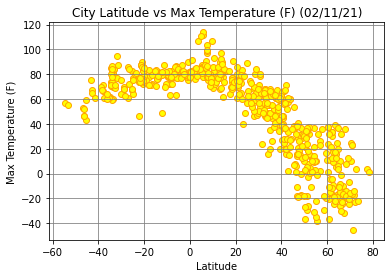

In [25]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], edgecolors ="orange", facecolors="yellow")
plt.title("City Latitude vs Max Temperature (F) (02/11/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(b=True, which = "major", axis = "both", linestyle = "-", color = "grey")

plt.savefig("output_data/Latitude vs. Temperature Plot.png")
plt.show()

## Latitude vs. Humidity Plot

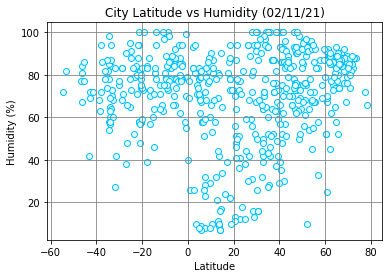

In [26]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], edgecolors ="deepskyblue", facecolors="lightcyan")
plt.title("City Latitude vs Humidity (02/11/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(b=True, which = "major", axis = "both", linestyle = "-", color = "grey")

plt.savefig("output_data/Latitude vs. Humidity Plot.png")
plt.show()

## Latitude vs. Cloudiness Plot

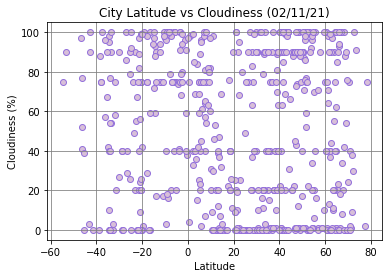

In [27]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], edgecolors ="mediumpurple", facecolors="thistle")
plt.title("City Latitude vs Cloudiness (02/11/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(b=True, which = "major", axis = "both", linestyle = "-", color = "grey")

plt.savefig("output_data/Latitude vs. Cloudiness Plot.png")
plt.show()

## Latitude vs. Wind Speed Plot

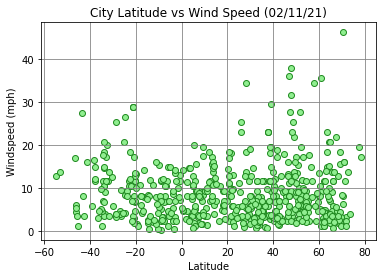

In [28]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], edgecolors ="forestgreen", facecolors="lightgreen")
plt.title("City Latitude vs Wind Speed (02/11/21)")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.grid(b=True, which = "major", axis = "both", linestyle = "-", color = "grey")

plt.savefig("output_data/Latitude vs. Wind Speed Plot.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.7684511759982368


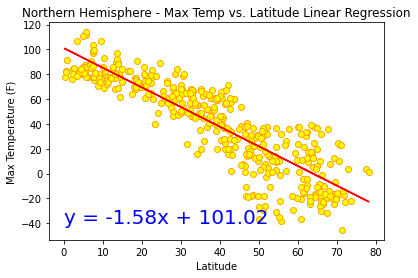

In [29]:
#islolated northern hemisphere data 
nh = weather_df.loc[weather_df["Lat"]>=0,:]

x_values = nh["Lat"]
y_values = nh["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, edgecolors = "orange", facecolors = "yellow")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-40),fontsize=20,color="blue")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print("The r-value is " + str(rvalue**2))

plt.savefig("output_data/Northern Hemisphere - Max Temp (F) vs. Latitude Linear Regression.png")
plt.show()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.2934322434253622


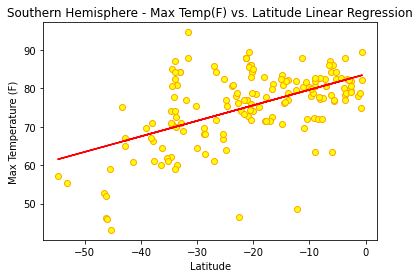

In [30]:
#islolated Southern hemisphere data 
sh = weather_df.loc[weather_df["Lat"]<0,:]

x_values = sh["Lat"]
y_values = sh["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, edgecolors = "orange", facecolors = "yellow")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,33),fontsize=20,color="blue")
plt.title("Southern Hemisphere - Max Temp(F) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print("The r-value is " + str(rvalue**2))

plt.savefig("output_data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.1570304468243784


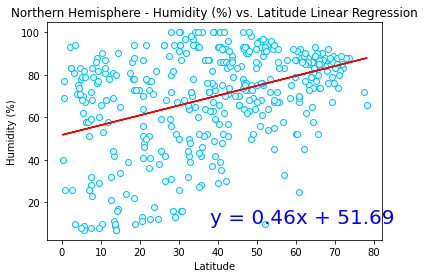

In [31]:
x_values = nh["Lat"]
y_values = nh["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, edgecolors ="deepskyblue", facecolors="lightcyan")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(38,10),fontsize=20,color="blue")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print("The r-value is " + str(rvalue**2))

plt.savefig("output_data/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.040992677107696364


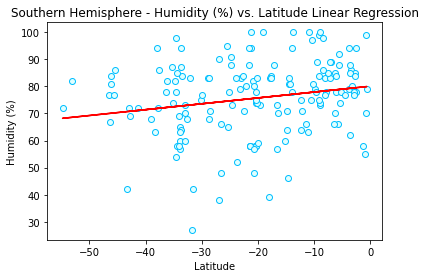

In [32]:
x_values = sh["Lat"]
y_values = sh["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, edgecolors ="deepskyblue", facecolors="lightcyan")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=20,color="blue")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print("The r-value is " + str(rvalue**2))

plt.savefig("output_data/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.0002838351620673159


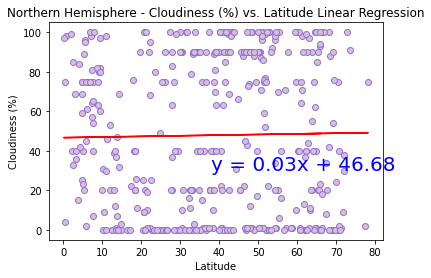

In [33]:
x_values = nh["Lat"]
y_values = nh["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, edgecolors ="mediumpurple", facecolors="thistle")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(38,30),fontsize=20,color="blue")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print("The r-value is " + str(rvalue**2))

plt.savefig("output_data/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.06728553790044058


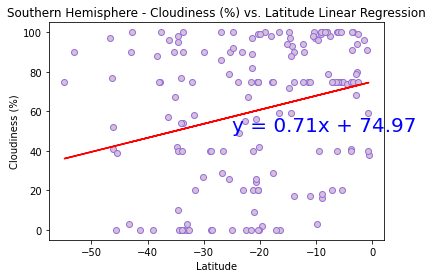

In [34]:
x_values = sh["Lat"]
y_values = sh["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, edgecolors = "mediumpurple", facecolors="thistle")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,50),fontsize=20,color="blue")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print("The r-value is " + str(rvalue**2))

plt.savefig("output_data/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.0046809542337095285


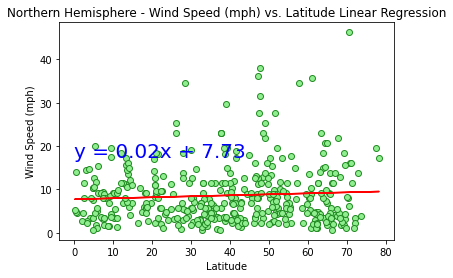

In [35]:
x_values = nh["Lat"]
y_values = nh["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, edgecolors = "forestgreen", facecolors="lightgreen")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,17.5),fontsize=20,color="blue")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print("The r-value is " + str(rvalue**2))

plt.savefig("output_data/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.04580012169498338


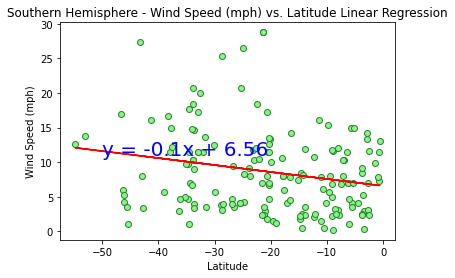

In [36]:
x_values = sh["Lat"]
y_values = sh["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, edgecolors = "forestgreen", facecolors="lightgreen")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,11),fontsize=20,color="blue")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print("The r-value is " + str(rvalue**2))

plt.savefig("output_data/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()